In [2]:
# Dependencies
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import csv
import pingouin as pg
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import pearsonr
import scipy.stats  as stats



In [3]:
#Reading the CSV file 
df = pd.read_csv('Popularity_df_mean.csv')
df = df.drop(columns = 'Unnamed: 0')
df

,Year,Acousticness,Danceability,Duration_Min,Energy,Explicit,Instrumentalness,Key,Liveness,Loudness,Popularity,Speechiness,Tempo,Valence
0,1920,0.7330,0.3390,9.135450,0.1920,0.0,0.677000,0.0,0.44300,-18.9590,28.0,0.04240,150.752,0.1800
1,1921,0.7320,0.8190,3.008883,0.3410,0.0,0.000000,7.0,0.16000,-12.4410,6.0,0.41500,60.936,0.9630
2,1922,0.6740,0.6450,2.115050,0.4450,0.0,0.744000,0.0,0.15100,-13.3380,6.0,0.45100,104.851,0.1270
3,1923,0.9960,0.6140,2.952217,0.0423,0.0,0.002930,4.0,0.18300,-12.0330,41.0,0.05350,89.822,0.2110
4,1924,0.8160,0.6780,3.433333,0.3950,0.0,0.240000,3.0,0.10000,-9.8250,15.0,0.13300,184.446,0.8320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2016,0.7010,0.3110,3.480450,0.4850,0.0,0.000000,6.0,0.07260,-5.7260,88.0,0.03650,77.355,0.2250
97,2017,0.2656,0.8240,2.695667,0.5855,0.5,0.000002,5.0,0.18900,-6.7590,87.0,0.18500,129.485,0.5515
98,2018,0.4830,0.7160,2.765117,0.5120,0.0,0.000000,1.0,0.09280,-6.2570,91.0,0.03310,104.957,0.3260
99,2019,0.1220,0.5480,2.900000,0.8160,0.0,0.000000,0.0,0.33500,-4.2090,91.0,0.04650,95.390,0.5570


In [4]:
df.columns = df.columns.str.title()
df

,Year,Acousticness,Danceability,Duration_Min,Energy,Explicit,Instrumentalness,Key,Liveness,Loudness,Popularity,Speechiness,Tempo,Valence
0,1920,0.7330,0.3390,9.135450,0.1920,0.0,0.677000,0.0,0.44300,-18.9590,28.0,0.04240,150.752,0.1800
1,1921,0.7320,0.8190,3.008883,0.3410,0.0,0.000000,7.0,0.16000,-12.4410,6.0,0.41500,60.936,0.9630
2,1922,0.6740,0.6450,2.115050,0.4450,0.0,0.744000,0.0,0.15100,-13.3380,6.0,0.45100,104.851,0.1270
3,1923,0.9960,0.6140,2.952217,0.0423,0.0,0.002930,4.0,0.18300,-12.0330,41.0,0.05350,89.822,0.2110
4,1924,0.8160,0.6780,3.433333,0.3950,0.0,0.240000,3.0,0.10000,-9.8250,15.0,0.13300,184.446,0.8320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2016,0.7010,0.3110,3.480450,0.4850,0.0,0.000000,6.0,0.07260,-5.7260,88.0,0.03650,77.355,0.2250
97,2017,0.2656,0.8240,2.695667,0.5855,0.5,0.000002,5.0,0.18900,-6.7590,87.0,0.18500,129.485,0.5515
98,2018,0.4830,0.7160,2.765117,0.5120,0.0,0.000000,1.0,0.09280,-6.2570,91.0,0.03310,104.957,0.3260
99,2019,0.1220,0.5480,2.900000,0.8160,0.0,0.000000,0.0,0.33500,-4.2090,91.0,0.04650,95.390,0.5570


In [5]:
column_list = df.columns[1:]
column_list 

Index(['Acousticness', 'Danceability', 'Duration_Min', 'Energy', 'Explicit',
       'Instrumentalness', 'Key', 'Liveness', 'Loudness', 'Popularity',
       'Speechiness', 'Tempo', 'Valence'],
      dtype='object')

In [6]:
df.describe()

,Year,Acousticness,Danceability,Duration_Min,Energy,Explicit,Instrumentalness,Key,Liveness,Loudness,Popularity,Speechiness,Tempo,Valence
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,1970.000000,0.490759,0.551550,3.731009,0.498690,0.059406,0.081580,4.683168,0.208469,-9.917616,69.732673,0.061626,121.772234,0.545609
std,29.300171,0.368806,0.175964,1.296212,0.253314,0.215489,0.225412,3.447987,0.148574,4.175160,19.925808,0.065666,32.013581,0.261295
min,1920.000000,0.000147,0.156000,1.952450,0.042300,0.000000,0.000000,0.000000,0.035900,-22.320000,6.000000,0.025300,60.936000,0.104000
25%,1945.000000,0.122000,0.429000,2.952217,0.247000,0.000000,0.000000,2.000000,0.096800,-12.472000,59.000000,0.033600,97.684000,0.328000
50%,1970.000000,0.483000,0.574000,3.413442,0.492000,0.000000,0.000081,4.500000,0.162000,-9.538000,79.000000,0.039100,117.046000,0.564000
75%,1995.000000,0.889000,0.678000,4.258217,0.698500,0.000000,0.004580,7.000000,0.276000,-7.129500,82.000000,0.059300,136.571000,0.776000
max,2020.000000,0.996000,0.920000,9.135450,0.970000,1.000000,0.941000,11.000000,0.784000,-2.646500,96.000000,0.451000,202.481000,0.979000


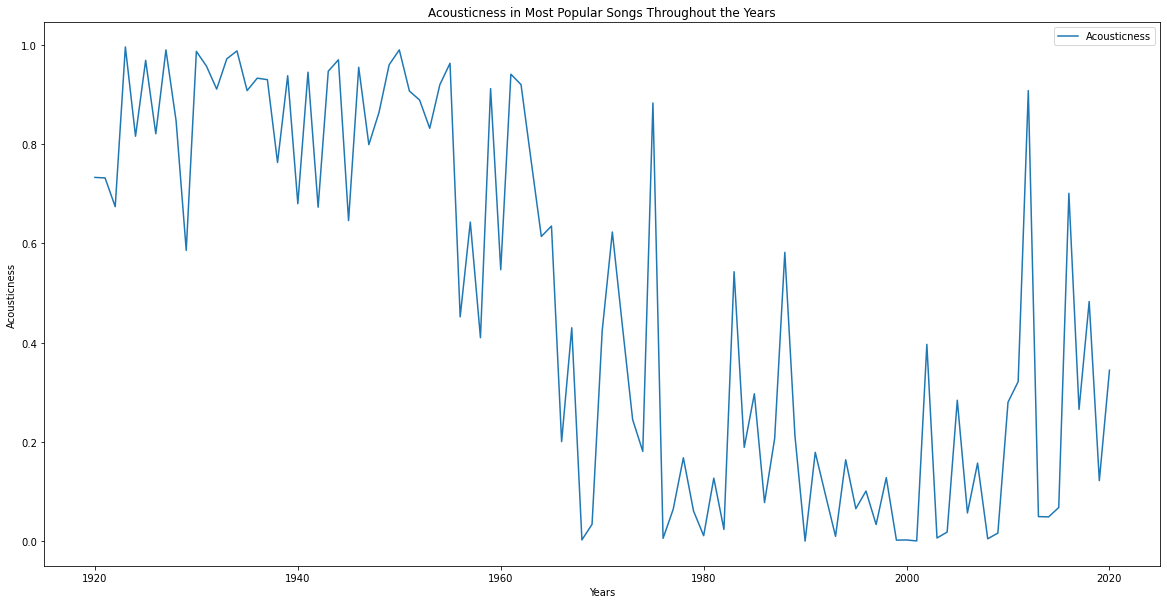

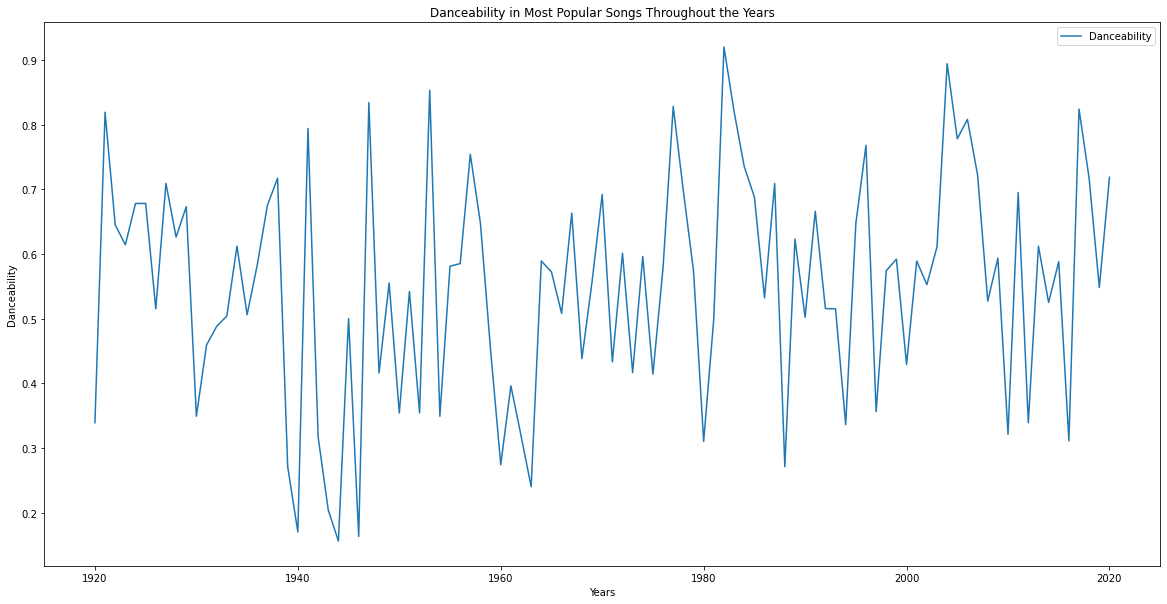

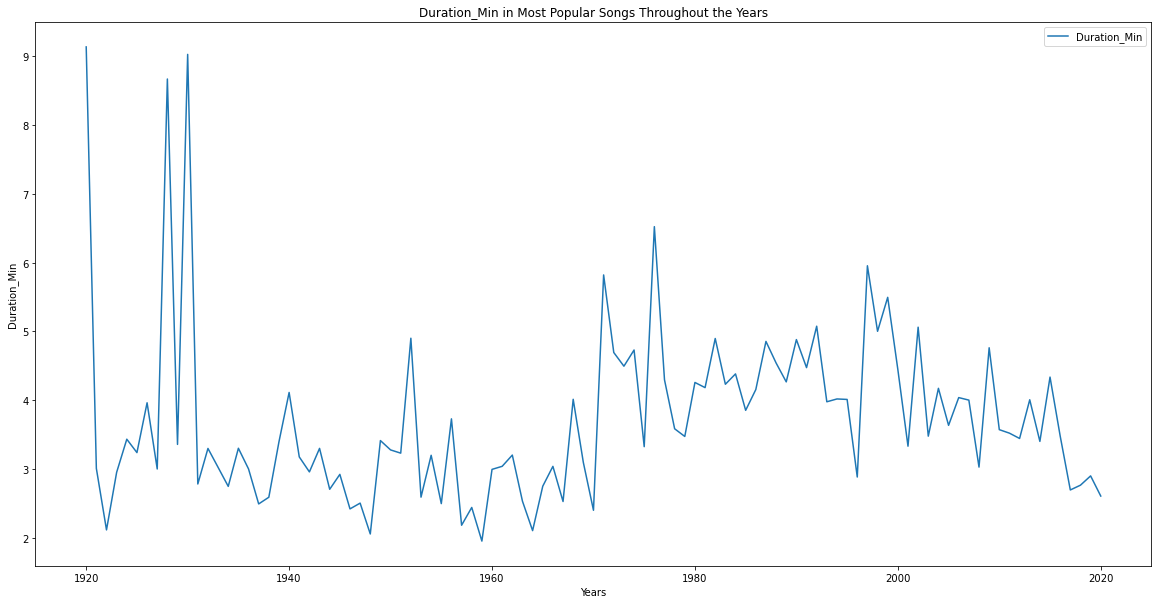

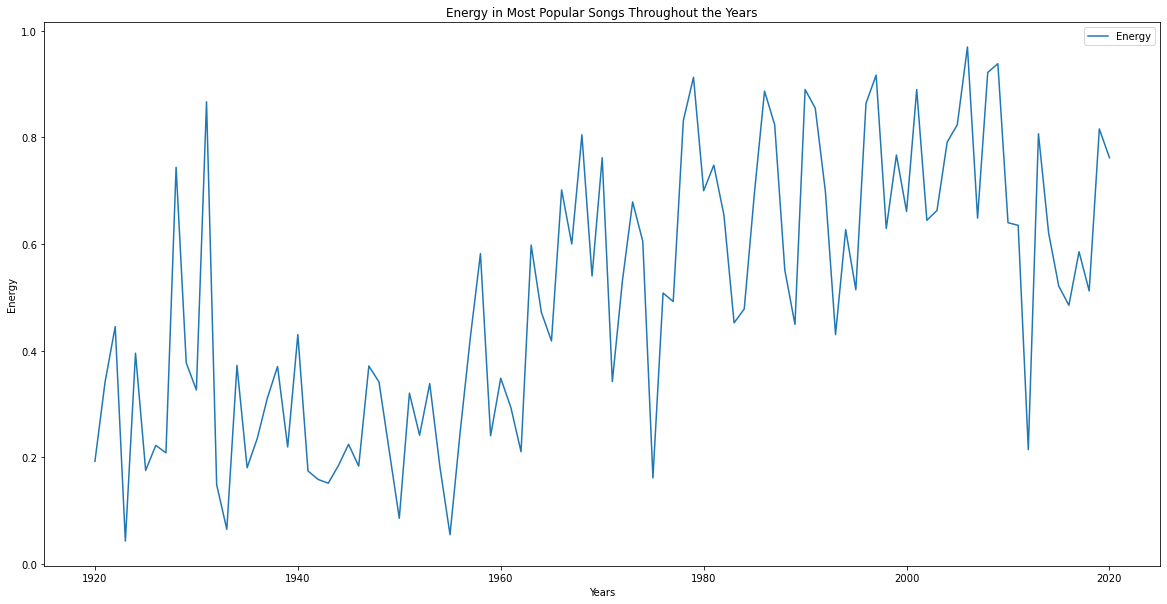

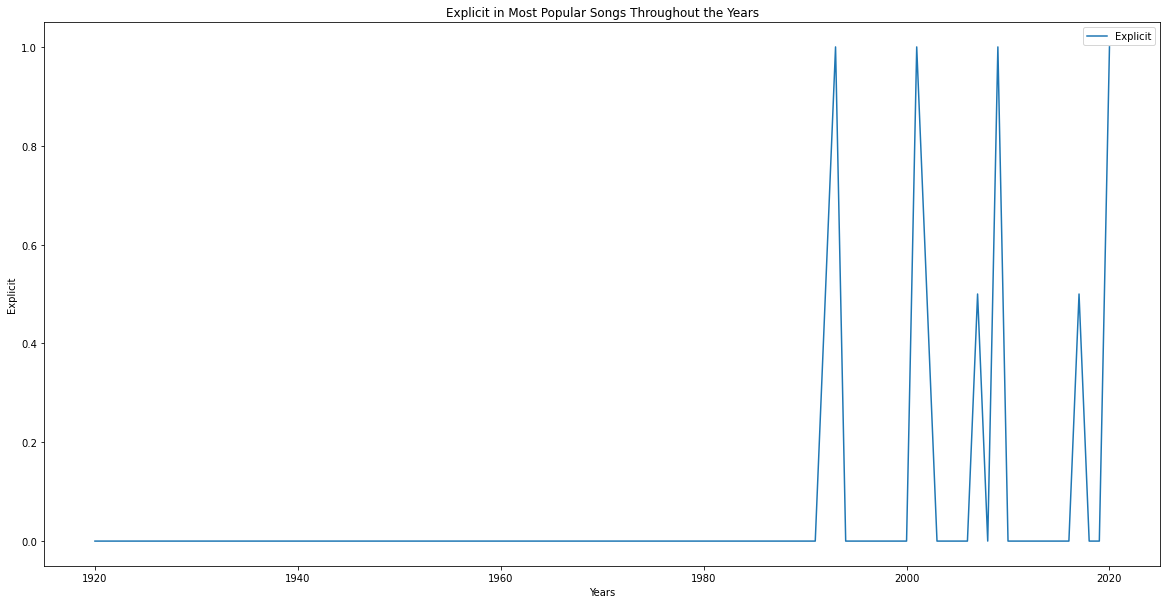

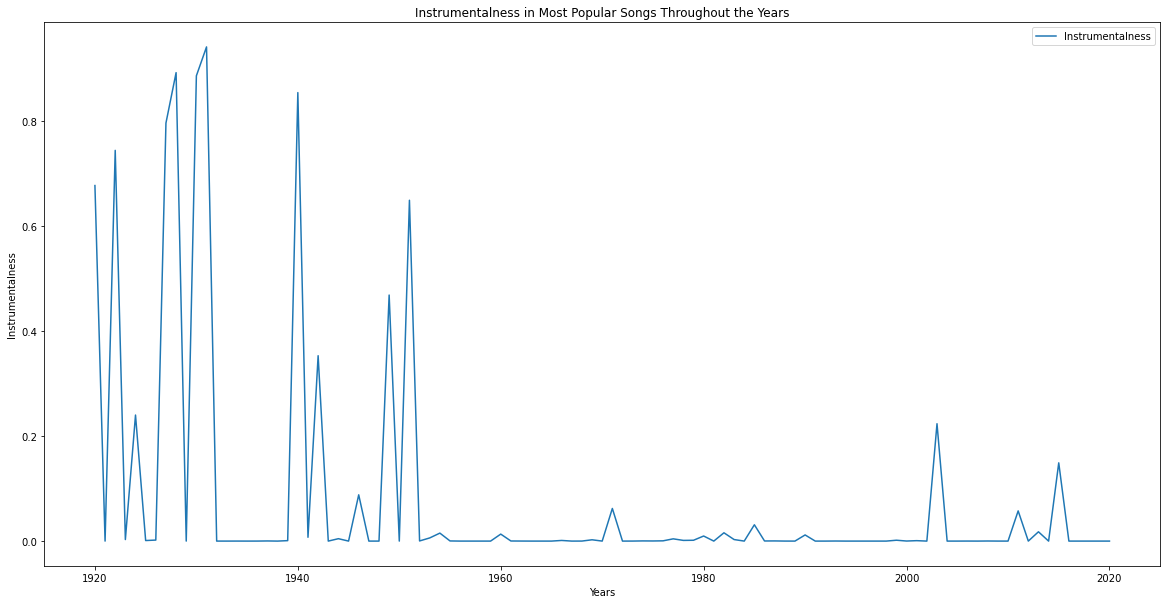

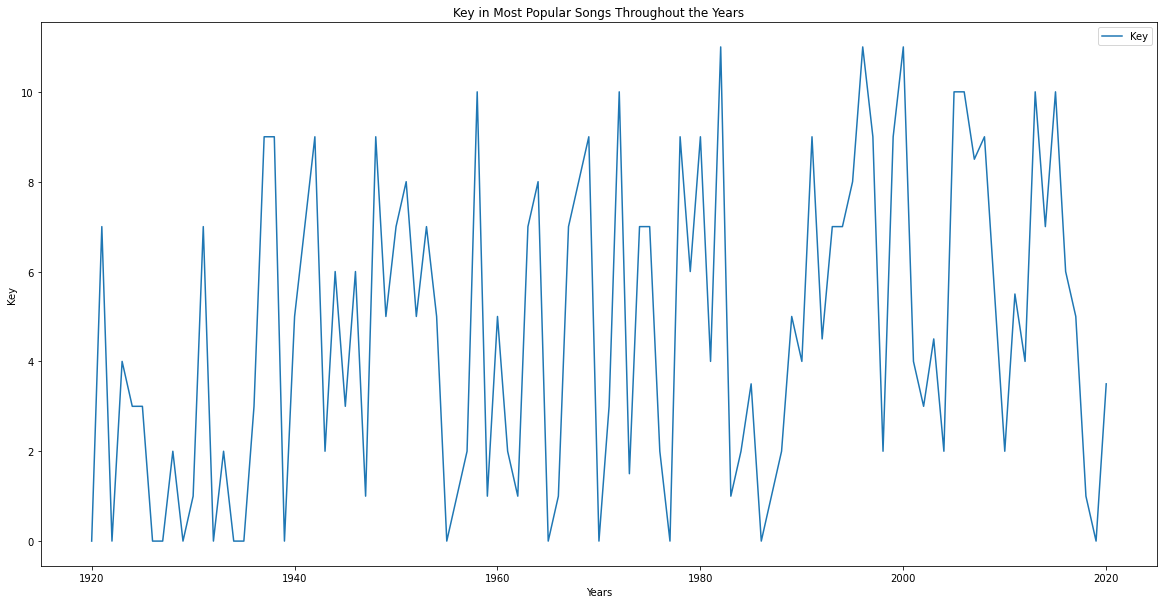

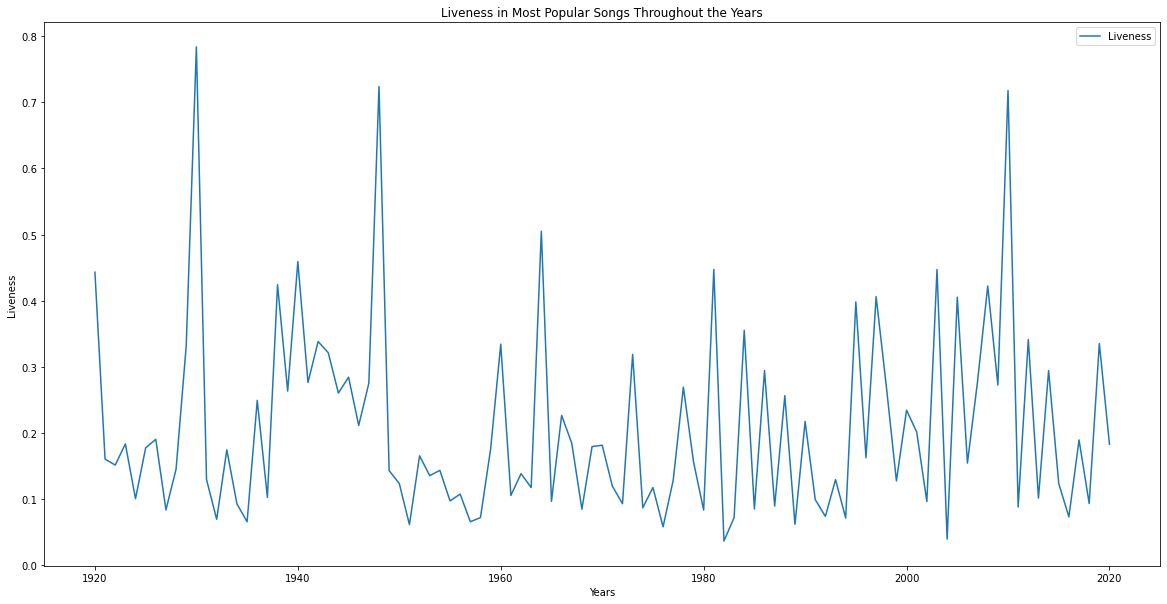

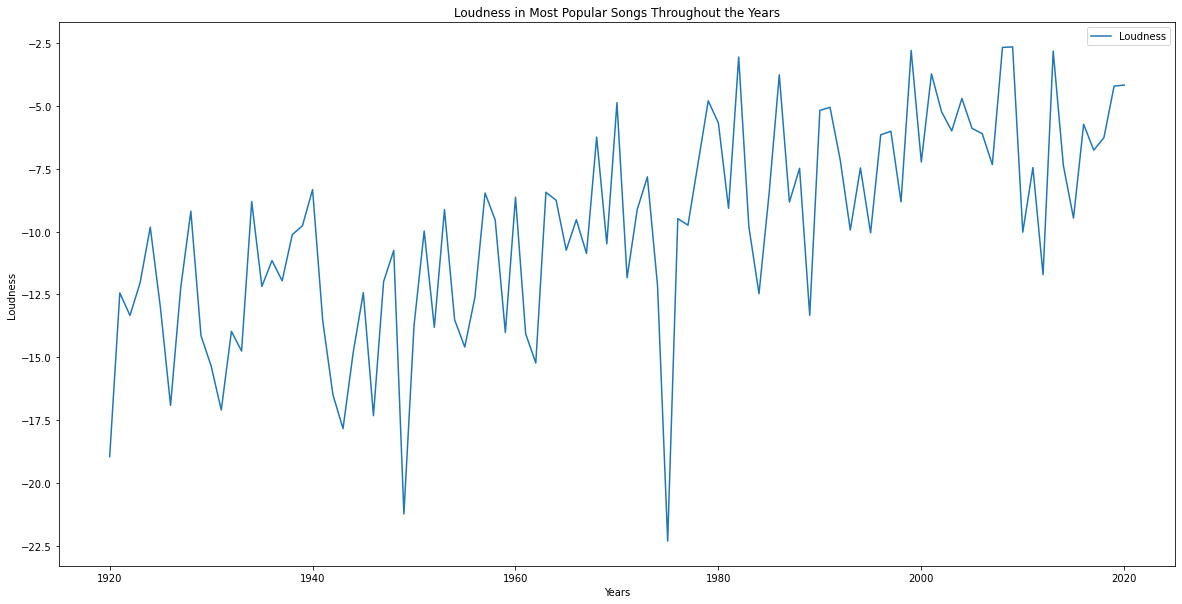

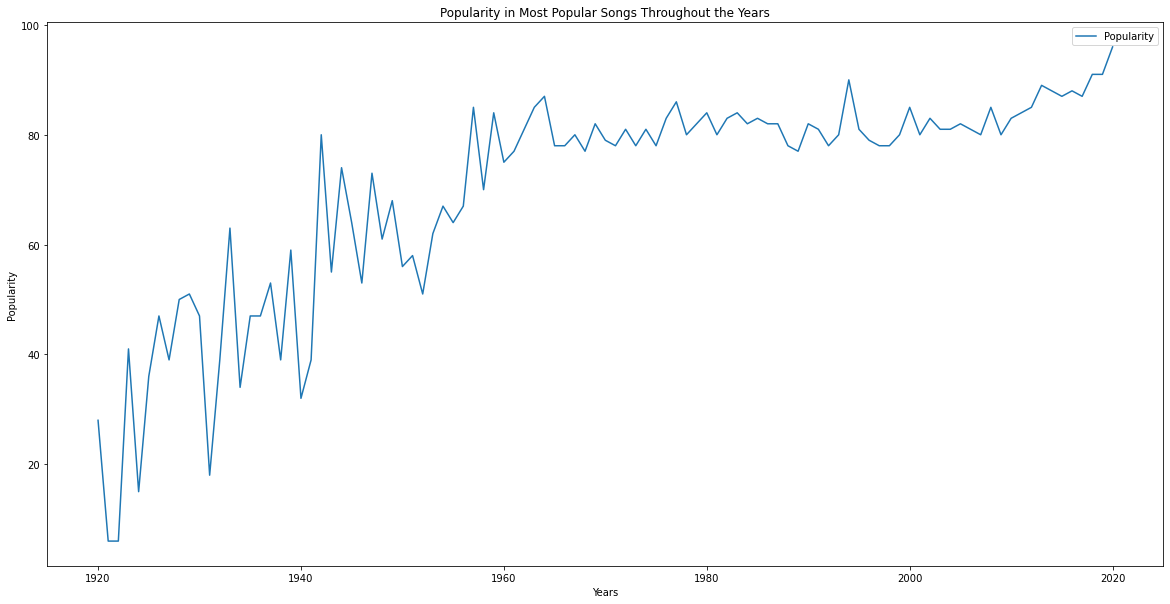

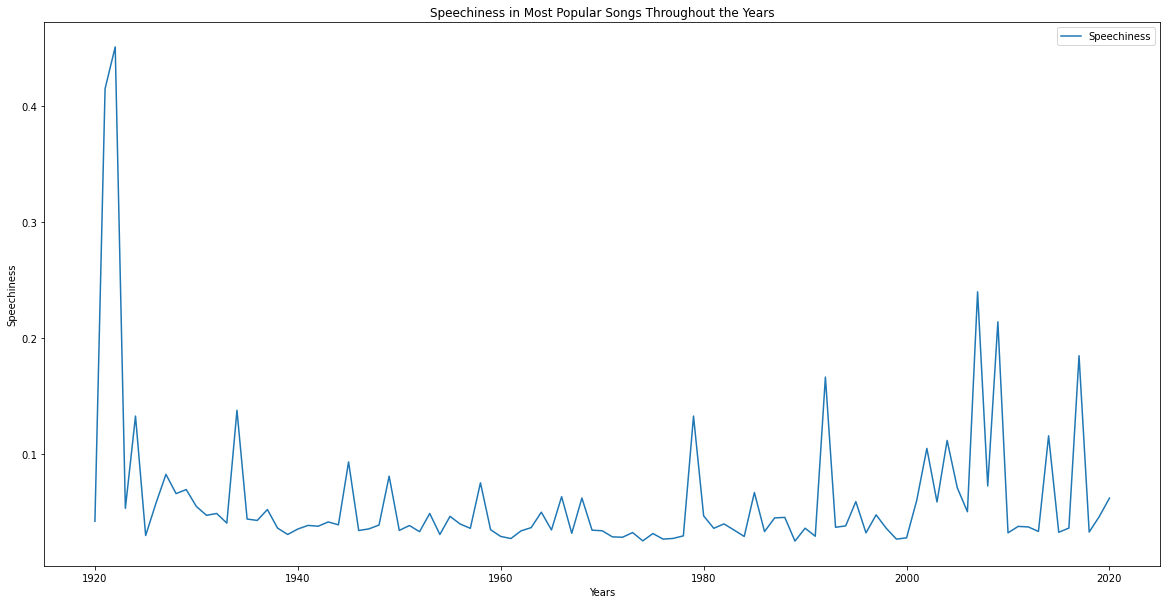

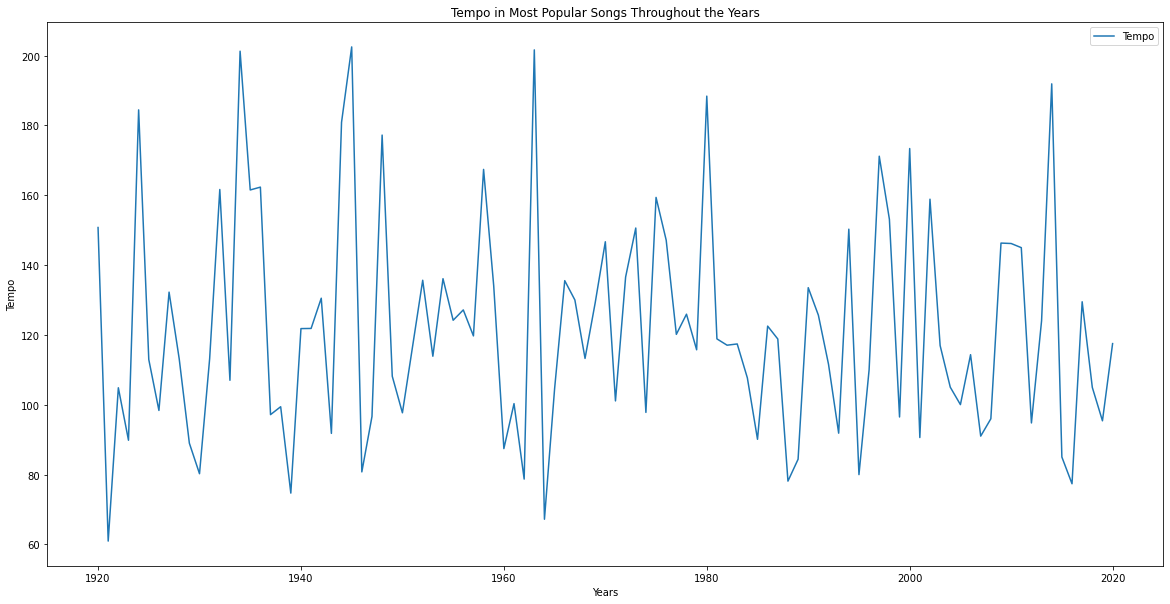

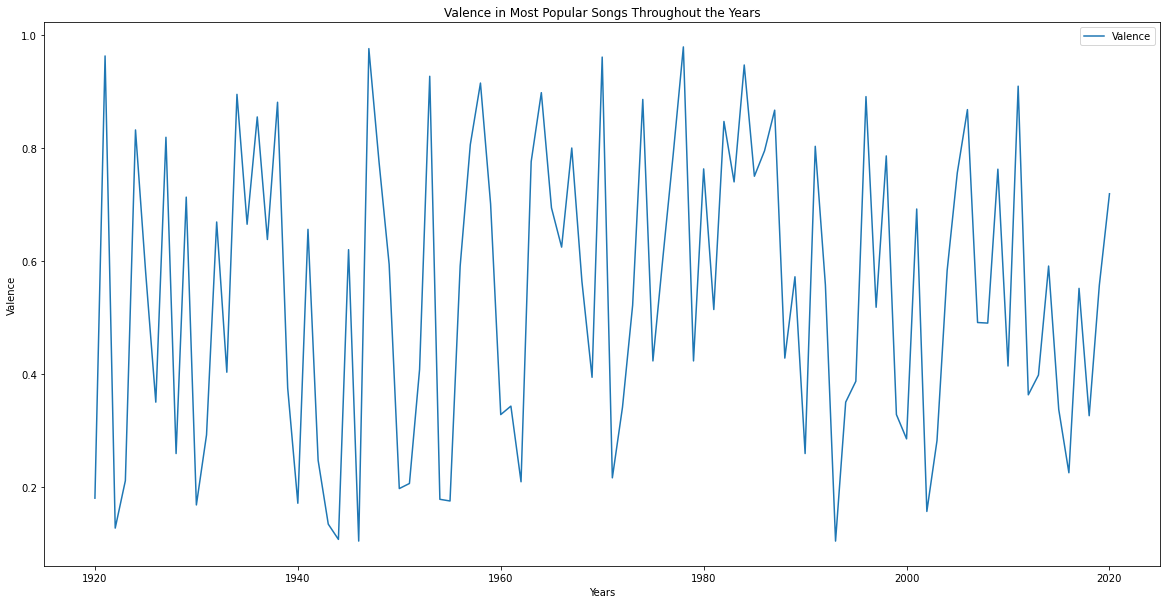

In [7]:
#Plotting graphs using for loop 
for i in column_list:
   
    df.plot(kind='line', x = 'Year', y = i, figsize=(20,10))
    plt.title(f'{i} in Most Popular Songs Throughout the Years')
    plt.xlabel('Years')
    plt.ylabel(i)
    
    plt.savefig(f"../Images/HighPopularity{i}overYears.png", facecolor = "w",bbox_inches="tight")
    
    plt.show();

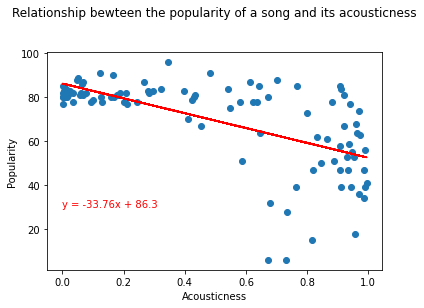

The r squared value is: 0.3905067215301228


In [8]:
#plot regression line for acousticness
x_axis = df['Acousticness']
y_axis = df['Popularity']

(slope, intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y = '+ str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, color ='r')
plt.annotate(line_eq,(0.0, 30),color ='r')

#Create the lables
plt.title(f"Relationship bewteen the popularity of a song and its acousticness\n\n")
plt.ylabel("Popularity")
plt.xlabel("Acousticness")




plt.show();

#save image
# plt.savefig("Images/Relationship bewteen the popularity of a song and its acousticness.png")
print(f'The r squared value is: {rvalue**2}')


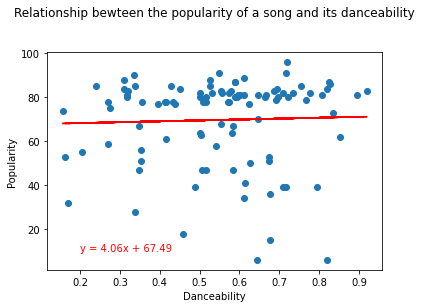

The r squared value is: 0.0012885997953128738


In [9]:
#plot regression line for danceability
x_axis = df['Danceability']
y_axis = df['Popularity']

(slope, intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y = '+ str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, color ='r')
plt.annotate(line_eq,(0.2, 10),color ='r')

#Create the lables
plt.title(f"Relationship bewteen the popularity of a song and its danceability\n\n")
plt.ylabel("Popularity")
plt.xlabel("Danceability")




plt.show();

#save image
# plt.savefig("Images/Relationship bewteen the popularity of a song and its acousticness.png")
print(f'The r squared value is: {rvalue**2}')

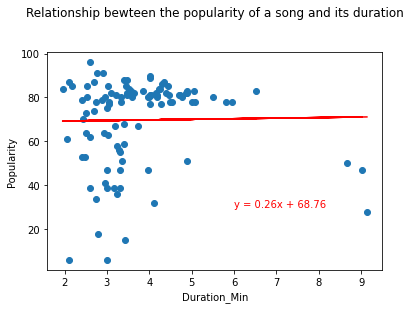

The r squared value is: 0.00028872532328678415


In [10]:
#plot regression line for danceability
x_axis = df['Duration_Min']
y_axis = df['Popularity']

(slope, intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y = '+ str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, color ='r')
plt.annotate(line_eq,(6, 30),color ='r')

#Create the lables
plt.title(f"Relationship bewteen the popularity of a song and its duration\n\n")
plt.ylabel("Popularity")
plt.xlabel("Duration_Min")




plt.show();

#save image
# plt.savefig("Images/Relationship bewteen the popularity of a song and its acousticness.png")
print(f'The r squared value is: {rvalue**2}')

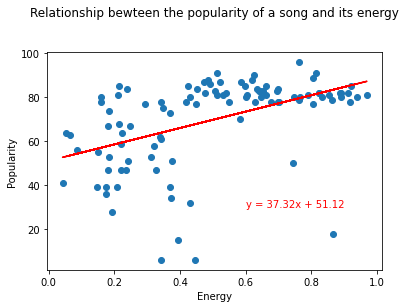

The r squared value is: 0.2250424096123076


<Figure size 432x288 with 0 Axes>

In [11]:
#plot regression line for Energy
x_axis = df['Energy']
y_axis = df['Popularity']

(slope, intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y = '+ str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, color ='r')
plt.annotate(line_eq,(0.6, 30),color ='r')

#Create the lables
plt.title(f"Relationship bewteen the popularity of a song and its energy\n\n")
plt.ylabel("Popularity")
plt.xlabel("Energy")




plt.show();

#save image
plt.savefig("energy&popularity.png")
print(f'The r squared value is: {rvalue**2}')


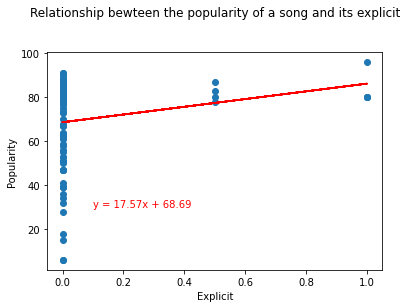

The r squared value is: 0.03611928330804256


In [12]:
#plot regression line for explicit
x_axis = df['Explicit']
y_axis = df['Popularity']

(slope, intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y = '+ str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, color ='r')
plt.annotate(line_eq,(0.1, 30),color ='r')

#Create the lables
plt.title(f"Relationship bewteen the popularity of a song and its explicit\n\n")
plt.ylabel("Popularity")
plt.xlabel("Explicit")




plt.show();

#save image
# plt.savefig("Images/Relationship bewteen the popularity of a song and its acousticness.png")
print(f'The r squared value is: {rvalue**2}')

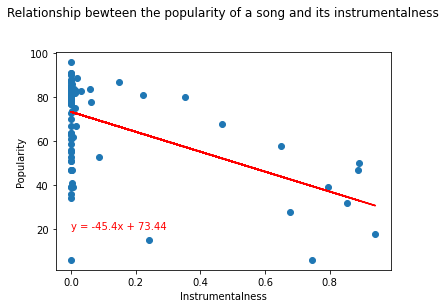

The r squared value is: 0.263799593430899


In [13]:
#plot regression line for Instrumentalness
x_axis = df['Instrumentalness']
y_axis = df['Popularity']

(slope, intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y = '+ str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, color ='r')
plt.annotate(line_eq,(0.0, 20),color ='r')

#Create the lables
plt.title(f"Relationship bewteen the popularity of a song and its instrumentalness\n\n")
plt.ylabel("Popularity")
plt.xlabel("Instrumentalness")




plt.show();

#save image
# plt.savefig("Images/Relationship bewteen the popularity of a song and its acousticness.png")
print(f'The r squared value is: {rvalue**2}')

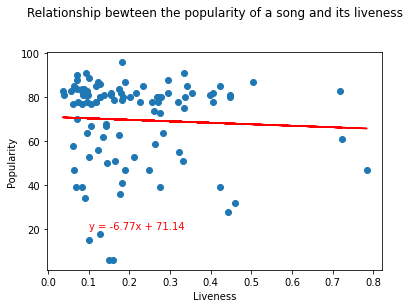

The r squared value is: 0.0025464748462913998


In [14]:
#plot regression line for Liveness
x_axis = df['Liveness']
y_axis = df['Popularity']

(slope, intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y = '+ str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, color ='r')
plt.annotate(line_eq,(0.1, 20),color ='r')

#Create the lables
plt.title(f"Relationship bewteen the popularity of a song and its liveness\n\n")
plt.ylabel("Popularity")
plt.xlabel("Liveness")




plt.show();

#save image
# plt.savefig("Images/Relationship bewteen the popularity of a song and its acousticness.png")
print(f'The r squared value is: {rvalue**2}')

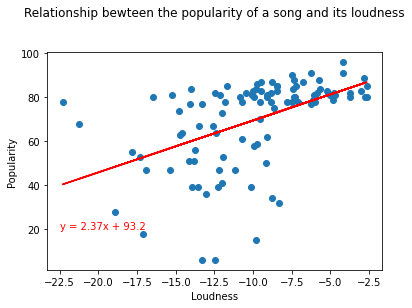

The r squared value is: 0.2458069399087262


In [15]:
#plot regression line for Loudness
x_axis = df['Loudness']
y_axis = df['Popularity']

(slope, intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y = '+ str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, color ='r')
plt.annotate(line_eq,(-22.50, 20),color ='r')

#Create the lables
plt.title(f"Relationship bewteen the popularity of a song and its loudness\n\n")
plt.ylabel("Popularity")
plt.xlabel("Loudness")




plt.show();

#save image
# plt.savefig("Images/Relationship bewteen the popularity of a song and its acousticness.png")
print(f'The r squared value is: {rvalue**2}')

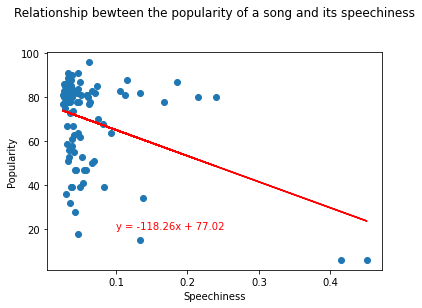

The r squared value is: 0.15189060730953236


In [16]:
#plot regression line for Speechiness
x_axis = df['Speechiness']
y_axis = df['Popularity']

(slope, intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y = '+ str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, color ='r')
plt.annotate(line_eq,(0.1, 20),color ='r')

#Create the lables
plt.title(f"Relationship bewteen the popularity of a song and its speechiness\n\n")
plt.ylabel("Popularity")
plt.xlabel("Speechiness")




plt.show();

#save image
# plt.savefig("Images/Relationship bewteen the popularity of a song and its acousticness.png")
print(f'The r squared value is: {rvalue**2}')

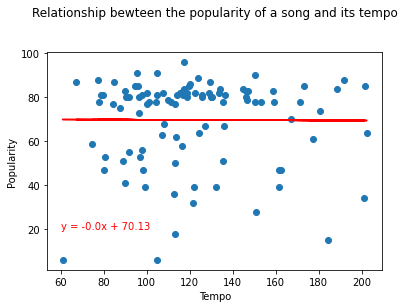

The r squared value is: 2.6906667019305908e-05


In [17]:
#plot regression line for Tempo
x_axis = df['Tempo']
y_axis = df['Popularity']

(slope, intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y = '+ str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, color ='r')
plt.annotate(line_eq,(60, 20),color ='r')

#Create the lables
plt.title(f"Relationship bewteen the popularity of a song and its tempo\n\n")
plt.ylabel("Popularity")
plt.xlabel("Tempo")




plt.show();

#save image
# plt.savefig("Images/Relationship bewteen the popularity of a song and its acousticness.png")
print(f'The r squared value is: {rvalue**2}')

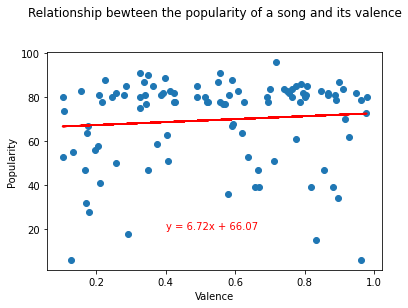

The r squared value is: 0.007759572781128184


In [18]:
#plot regression line for Valence
x_axis = df['Valence']
y_axis = df['Popularity']

(slope, intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y = '+ str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, color ='r')
plt.annotate(line_eq,(0.4, 20),color ='r')

#Create the lables
plt.title(f"Relationship bewteen the popularity of a song and its valence\n\n")
plt.ylabel("Popularity")
plt.xlabel("Valence")




plt.show();

#save image
# plt.savefig("Images/Relationship bewteen the popularity of a song and its acousticness.png")
print(f'The r squared value is: {rvalue**2}')

In [19]:
df.head()

,Year,Acousticness,Danceability,Duration_Min,Energy,Explicit,Instrumentalness,Key,Liveness,Loudness,Popularity,Speechiness,Tempo,Valence
0,1920,0.733,0.339,9.135450,0.1920,0.0,0.67700,0.0,0.443,-18.959,28.0,0.0424,150.752,0.180
1,1921,0.732,0.819,3.008883,0.3410,0.0,0.00000,7.0,0.160,-12.441,6.0,0.4150,60.936,0.963
2,1922,0.674,0.645,2.115050,0.4450,0.0,0.74400,0.0,0.151,-13.338,6.0,0.4510,104.851,0.127
3,1923,0.996,0.614,2.952217,0.0423,0.0,0.00293,4.0,0.183,-12.033,41.0,0.0535,89.822,0.211
4,1924,0.816,0.678,3.433333,0.3950,0.0,0.24000,3.0,0.100,-9.825,15.0,0.1330,184.446,0.832


# Statistical analysis 
## Is there a relationship bewteeen two numerical sets of data

We will be using the pearsons correaltion test to see if there is statistical evidence to prove a relationship bewteen the popularity of a song and the following song components: Acousticness, Danceability, Energy, Instrumentals, Liveness, Loudness, Speechiness, Tempo & Valence.

Following the guidelines of the data set used, Popularity refferes to the amount of times a song has been played by users. This data was last updated on January 2021. 




In [20]:
#Creating the correlation table 
df_corr = df.corr()

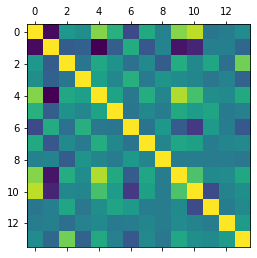

In [21]:
#plotting correaltion table
plt.matshow(df_corr)

In [22]:
p_correlation_matrix_df = df.corr()

p_correlation_matrix_df


,Year,Acousticness,Danceability,Duration_Min,Energy,Explicit,Instrumentalness,Key,Liveness,Loudness,Popularity,Speechiness,Tempo,Valence
Year,1.000000,-0.759283,0.156190,0.085168,0.664768,0.335769,-0.404128,0.289528,-0.013507,0.669365,0.818458,-0.100141,-0.044613,0.059617
Acousticness,-0.759283,1.000000,-0.280428,-0.252569,-0.812589,-0.266364,0.305120,-0.321249,0.008502,-0.713160,-0.624905,-0.027378,-0.031289,-0.197971
Danceability,0.156190,-0.280428,1.000000,-0.103400,0.277768,0.109103,-0.136460,0.052480,-0.276702,0.311252,0.035897,0.249623,-0.140701,0.611436
Duration_Min,0.085168,-0.252569,-0.103400,1.000000,0.212776,0.025416,0.329854,-0.069392,0.128596,0.064854,0.016992,-0.097462,-0.005486,-0.236913
Energy,0.664768,-0.812589,0.277768,0.212776,1.000000,0.241244,-0.087815,0.306149,0.014359,0.786966,0.474386,0.080929,0.046971,0.285632
Explicit,0.335769,-0.266364,0.109103,0.025416,0.241244,1.000000,-0.100567,0.032315,-0.046255,0.286922,0.190051,0.249194,-0.056442,-0.020940
Instrumentalness,-0.404128,0.305120,-0.136460,0.329854,-0.087815,-0.100567,1.000000,-0.117727,0.155306,-0.288010,-0.513614,0.166261,-0.054616,-0.314625
Key,0.289528,-0.321249,0.052480,-0.069392,0.306149,0.032315,-0.117727,1.000000,0.012956,0.259891,0.217083,-0.041873,0.022726,0.040807
Liveness,-0.013507,0.008502,-0.276702,0.128596,0.014359,-0.046255,0.155306,0.012956,1.000000,-0.050396,-0.050463,-0.054164,-0.051607,-0.093680
Loudness,0.669365,-0.713160,0.311252,0.064854,0.786966,0.286922,-0.288010,0.259891,-0.050396,1.000000,0.495789,0.055903,0.058554,0.277026


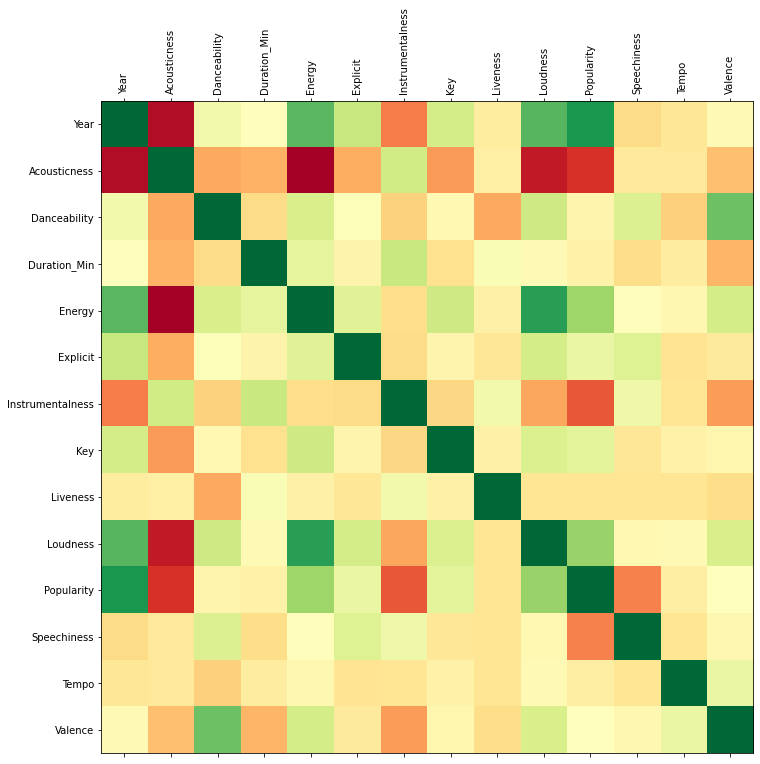

In [23]:
#creating figure for correlation 

labels = [c for c in df_corr.columns]

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.matshow(df_corr, cmap=plt.cm.RdYlGn)

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

ax.set_yticklabels(labels)
ax.set_xticklabels(labels, rotation=90)

plt.savefig("../Images/correlation_matrix.png", facecolor = "w", bbox_inches= "tight" )
plt.show()

#This proves the study that people are listing to new music more

In [37]:
#Getting the correlation coefficient and r value bewteen popularity and all the other key song components
aco_pearson = stats.pearsonr(df['Popularity'], df['Acousticness'])
dan_pearson = stats.pearsonr(df['Popularity'], df['Danceability'])
dur_pearson = stats.pearsonr(df['Popularity'], df['Duration_Min'])
ene_pearson = stats.pearsonr(df['Popularity'], df['Energy'])
exp_pearson = stats.pearsonr(df['Popularity'], df['Explicit'])
ins_pearson = stats.pearsonr(df['Popularity'], df['Instrumentalness'])
key_pearson = stats.pearsonr(df['Popularity'], df['Key'])
liv_pearson = stats.pearsonr(df['Popularity'], df['Liveness'])
lou_pearson = stats.pearsonr(df['Popularity'], df['Loudness'])
spe_pearson = stats.pearsonr(df['Popularity'], df['Speechiness'])
tem_pearson = stats.pearsonr(df['Popularity'], df['Tempo'])
val_pearson = stats.pearsonr(df['Popularity'], df['Valence'])

#Creating pearsons list
pearson_lsit= [aco_pearson,dan_pearson,dur_pearson,ene_pearson,exp_pearson,ins_pearson,key_pearson,liv_pearson,lou_pearson,spe_pearson,tem_pearson,val_pearson]
pearson_lsit

[(-0.624905370060238, 2.862188850018452e-12),
 (0.03589707223873379, 0.7215518761208793),
 (0.016991919352644796, 0.8660693885645171),
 (0.47438635057546474, 5.400249990300691e-07),
 (0.1900507387726829, 0.0569622474096255),
 (-0.5136142457437282, 3.957429269452583e-08),
 (0.21708301789989237, 0.02921482621130837),
 (-0.050462608397618555, 0.6162656565106043),
 (0.49578920914913654, 1.3513937979108743e-07),
 (-0.38973145537604814, 5.613463522908384e-05),
 (-0.005187163677705345, 0.9589415979198488),
 (0.08808843727259663, 0.3810501562990273)]

In [50]:
#creating df that displays correlation p vlaue and song component
compiled_df = pd.DataFrame({'Acousticness': aco_pearson,
                           'Danceability': dan_pearson,
                           'Duration_Min': dur_pearson,
                           'Energy': ene_pearson,
                           'Explicit': exp_pearson,
                           'Instrumentalness': ins_pearson,
                           'Key': key_pearson,
                           'Liveness': liv_pearson,
                           'Loudness': lou_pearson,
                           'Speechiness': spe_pearson,
                           'Tempo': tem_pearson,
                           'Valence': val_pearson})
fresh_df = compiled_df.transpose()

fresh_df

,0,1
Acousticness,-0.624905,2.862189e-12
Danceability,0.035897,7.215519e-01
Duration_Min,0.016992,8.660694e-01
Energy,0.474386,5.400250e-07
Explicit,0.190051,5.696225e-02
Instrumentalness,-0.513614,3.957429e-08
Key,0.217083,2.921483e-02
Liveness,-0.050463,6.162657e-01
Loudness,0.495789,1.351394e-07
Speechiness,-0.389731,5.613464e-05


In [62]:
#renaming columns
fresh_df.columns[0:]
fresh_df.rename(columns={0: 'Correlation', 1: 'P-value'}, inplace=True)
round(fresh_df,3)

,Correlation,P-value
Acousticness,-0.625,0.000
Danceability,0.036,0.722
Duration_Min,0.017,0.866
Energy,0.474,0.000
Explicit,0.190,0.057
Instrumentalness,-0.514,0.000
Key,0.217,0.029
Liveness,-0.050,0.616
Loudness,0.496,0.000
Speechiness,-0.390,0.000


In [82]:
#creating function to highlight the p vlaue that show statistical evidence
def highlight_number (number):
    criteria = (number <=0.05) 
    return['background-color: yellow' if i else ''for i in criteria]
fresh_df[['P-value']].style.apply(highlight_number)

,P-value
Acousticness,0.000000
Danceability,0.721552
Duration_Min,0.866069
Energy,0.000001
Explicit,0.056962
Instrumentalness,0.000000
Key,0.029215
Liveness,0.616266
Loudness,0.000000
Speechiness,0.000056


In [64]:
#heatmap not going to use it
fresh_df.style.background_gradient(cmap='coolwarm')

,Correlation,P-value
Acousticness,-0.624905,0.000000
Danceability,0.035897,0.721552
Duration_Min,0.016992,0.866069
Energy,0.474386,0.000001
Explicit,0.190051,0.056962
Instrumentalness,-0.513614,0.000000
Key,0.217083,0.029215
Liveness,-0.050463,0.616266
Loudness,0.495789,0.000000
Speechiness,-0.389731,0.000056


#### Popularity & Acousticness

Acousticness referes to ... and its measurde by

Question: Is there a relationship bewteen the songs acousticness level and its popularity?

Hypothesis: There is a relationship 

Null hypothesis: There is no relationship

Alpha value or significance level = 0.05

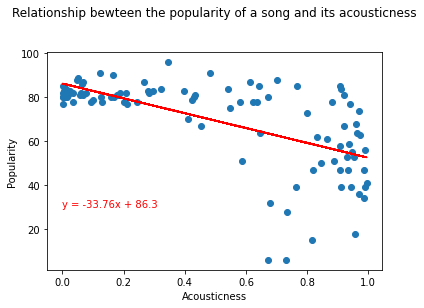

The r squared value is: 0.3905067215301228

Pearson's correlation analysis: The correlation coefficient and the P-value are as follow: (-0.624905370060238, 2.862188850018452e-12) 
This means there is a moderate negative correlation bewteen the variables and based on the P value we can reject out null hypothesis. This means that there is sufficient statistical evidence to show that there is a relationship bewteen the acousticness of the song and its popularity.


In [25]:

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html
#plot regression line for acousticness

x_axis = df['Acousticness']
y_axis = df['Popularity']

(slope, intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y = '+ str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, color ='r')
plt.annotate(line_eq,(0.0, 30),color ='r')

#Create the lables
plt.title(f"Relationship bewteen the popularity of a song and its acousticness\n\n")
plt.ylabel("Popularity")
plt.xlabel("Acousticness")

#save image
plt.savefig("../Images/Aco&popularity.png", facecolor = "w", bbox_inches= "tight" )

plt.show();



print(f'The r squared value is: {rvalue**2}\n')
print(f"Pearson's correlation analysis: The correlation coefficient and the P-value are as follow: {aco_pearson} ")
print("This means there is a moderate negative correlation bewteen the variables and based on the P value we can reject out null hypothesis. This means that there is sufficient statistical evidence to show that there is a relationship bewteen the acousticness of the song and its popularity." )


#### Popularity & Danceability
Danceability referes to ... and its measurde by

Question: Is there a relationship bewteen the songs danceability level and its popularity?

Hypothesis: There is a relationship 

Null hypothesis: There is no relationship

Alpha value or significance level = 0.05

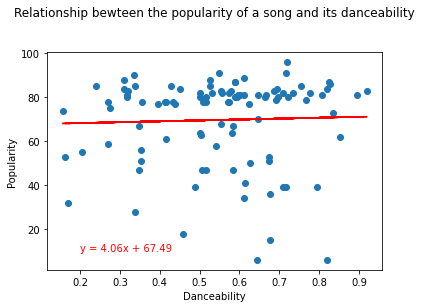

The r squared value is: 0.0012885997953128738

Pearson's correlation analysis: The correlation coefficient and the P-value are as follow: (0.03589707223873379, 0.7215518761208793) 
This means there is no correlation bewteen the variables and based on the P value we can not reject out null hypothesis. This means that there is not sufficient statistical evidence to show that there is a relationship bewteen the dancebility of the song and its popularity.


In [26]:
#plot regression line for danceability
x_axis = df['Danceability']
y_axis = df['Popularity']

(slope, intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y = '+ str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, color ='r')
plt.annotate(line_eq,(0.2, 10),color ='r')

#Create the lables
plt.title(f"Relationship bewteen the popularity of a song and its danceability\n\n")
plt.ylabel("Popularity")
plt.xlabel("Danceability")

#save image
plt.savefig("../Images/dan&popularity.png", facecolor = "w", bbox_inches= "tight" )


plt.show();



print(f'The r squared value is: {rvalue**2}\n')
print(f"Pearson's correlation analysis: The correlation coefficient and the P-value are as follow: {dan_pearson} ")
print("This means there is no correlation bewteen the variables and based on the P value we can not reject out null hypothesis. This means that there is not sufficient statistical evidence to show that there is a relationship bewteen the dancebility of the song and its popularity." )


#### Popularity & Duration_Ms
Danceability referes to ... and its measurde by

Question: Is there a relationship bewteen the songs duration level and its popularity?

Hypothesis: There is a relationship 
Null hypothesis: There is no relationship

Alpha value or significance level = 0.05

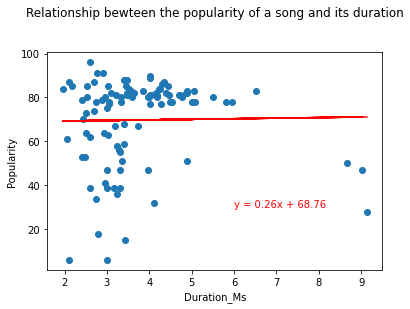

The r squared value is: 0.00028872532328678415

Pearson's correlation analysis: The correlation coefficient and the P-value are as follow: (0.016991919352644796, 0.8660693885645171) 
This means there is no correlation bewteen the variables and based on the P value we can not reject out null hypothesis. This means that there is not sufficient statistical evidence to show that there is a relationship bewteen the duration of a song and its popularity.


In [27]:
#plot regression line for danceability
x_axis = df['Duration_Min']
y_axis = df['Popularity']

(slope, intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y = '+ str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, color ='r')
plt.annotate(line_eq,(6, 30),color ='r')

#Create the lables
plt.title(f"Relationship bewteen the popularity of a song and its duration\n\n")
plt.ylabel("Popularity")
plt.xlabel("Duration_Ms")

#save image
plt.savefig("../Images/Dur&popularity.png", facecolor = "w", bbox_inches= "tight" )


plt.show();



print(f'The r squared value is: {rvalue**2}\n')
print(f"Pearson's correlation analysis: The correlation coefficient and the P-value are as follow: {dur_pearson} ")
print("This means there is no correlation bewteen the variables and based on the P value we can not reject out null hypothesis. This means that there is not sufficient statistical evidence to show that there is a relationship bewteen the duration of a song and its popularity." )


#### Popularity & Energy
Danceability referes to ... and its measurde by

Question: Is there a relationship bewteen the songs energy level and its popularity?

Hypothesis: There is a relationship 
Null hypothesis: There is no relationship

Alpha value or significance level = 0.05

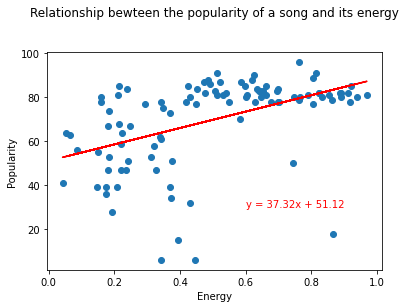

The r squared value is: 0.2250424096123076

Pearson's correlation analysis: The correlation coefficient and the P-value are as follow: (0.47438635057546474, 5.400249990300691e-07) 
This means there is a moderate positive correlation bewteen the variables and based on the P value we can reject out null hypothesis. This means that there is sufficient statistical evidence to show that there is a relationship bewteen the energy of the song and its popularity.


In [28]:
#plot regression line for Energy
x_axis = df['Energy']
y_axis = df['Popularity']

(slope, intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y = '+ str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, color ='r')
plt.annotate(line_eq,(0.6, 30),color ='r')

#Create the lables
plt.title(f"Relationship bewteen the popularity of a song and its energy\n\n")
plt.ylabel("Popularity")
plt.xlabel("Energy")

#save image
plt.savefig("../Images/Ene&popularity.png", facecolor = "w", bbox_inches= "tight" )


plt.show();



print(f'The r squared value is: {rvalue**2}\n')
print(f"Pearson's correlation analysis: The correlation coefficient and the P-value are as follow: {ene_pearson} ")
print("This means there is a moderate positive correlation bewteen the variables and based on the P value we can reject out null hypothesis. This means that there is sufficient statistical evidence to show that there is a relationship bewteen the energy of the song and its popularity." )


#### Popularity & Explicit 
Instrumentalness referes to ... and its measurde by

Question: Is there a relationship bewteen the songs Explicit level and its popularity?

Hypothesis: There is a relationship 
Null hypothesis: There is no relationship

Alpha value or significance level = 0.05

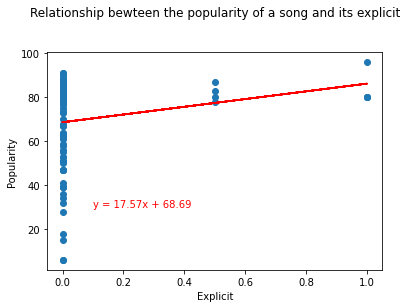

The r squared value is: 0.03611928330804256

Pearson's correlation analysis: The correlation coefficient and the P-value are as follow: (0.1900507387726829, 0.0569622474096255) 
This means there is a light positive correlation bewteen the variables and based on the P value we can not reject out null hypothesis. This means that there is no sufficient statistical evidence to show that there is a relationship bewteen the explicit of the song and its popularity.


In [29]:
#plot regression line for explicit
x_axis = df['Explicit']
y_axis = df['Popularity']

(slope, intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y = '+ str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, color ='r')
plt.annotate(line_eq,(0.1, 30),color ='r')

#Create the lables
plt.title(f"Relationship bewteen the popularity of a song and its explicit\n\n")
plt.ylabel("Popularity")
plt.xlabel("Explicit")


#save image
plt.savefig("../Images/exp&popularity.png", facecolor = "w", bbox_inches= "tight" )



plt.show();

print(f'The r squared value is: {rvalue**2}\n')
print(f"Pearson's correlation analysis: The correlation coefficient and the P-value are as follow: {exp_pearson} ")
print("This means there is a light positive correlation bewteen the variables and based on the P value we can not reject out null hypothesis. This means that there is no sufficient statistical evidence to show that there is a relationship bewteen the explicit of the song and its popularity." )


#### Popularity & Instrumentalness
Instrumentalness referes to ... and its measurde by

Question: Is there a relationship bewteen the songs instrumentalness level and its popularity?

Hypothesis: There is a relationship 
Null hypothesis: There is no relationship

Alpha value or significance level = 0.05

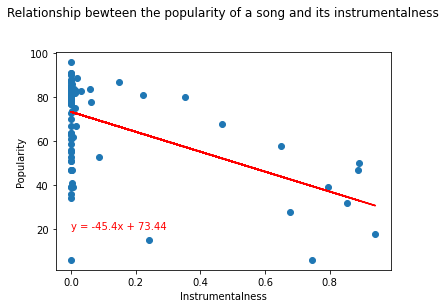

The r squared value is: 0.263799593430899

Pearson's correlation analysis: The correlation coefficient and the P-value are as follow: (-0.5136142457437282, 3.957429269452583e-08) 
This means there is a moderate negative positive correlation bewteen the variables and based on the P value we can reject the null hypothesis. This means that there is sufficient statistical evidence to show that there is a relationship bewteen the instrumentalness of the song and its popularity.


In [30]:
#plot regression line for Instrumentalness
x_axis = df['Instrumentalness']
y_axis = df['Popularity']

(slope, intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y = '+ str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, color ='r')
plt.annotate(line_eq,(0.0, 20),color ='r')

#Create the lables
plt.title(f"Relationship bewteen the popularity of a song and its instrumentalness\n\n")
plt.ylabel("Popularity")
plt.xlabel("Instrumentalness")

#save image
plt.savefig("../Images/ins&popularity.png", facecolor = "w", bbox_inches= "tight" )


plt.show();



print(f'The r squared value is: {rvalue**2}\n')
print(f"Pearson's correlation analysis: The correlation coefficient and the P-value are as follow: {ins_pearson} ")
print("This means there is a moderate negative positive correlation bewteen the variables and based on the P value we can reject the null hypothesis. This means that there is sufficient statistical evidence to show that there is a relationship bewteen the instrumentalness of the song and its popularity." )


#### Popularity & key
Key referes to ... and its measurde by

Question: Is there a relationship bewteen the songs liveness level and its popularity?

Hypothesis: There is a relationship 
Null hypothesis: There is no relationship

Alpha value or significance level = 0.05

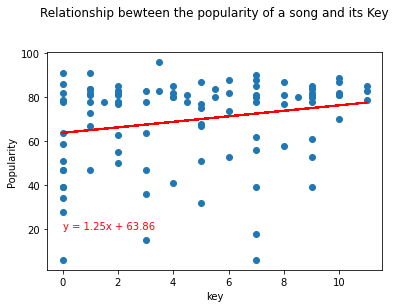

The r squared value is: 0.04712503666052493

Pearson's correlation analysis: The correlation coefficient and the P-value are as follow: (0.21708301789989237, 0.02921482621130837) 
This means there is a moderate positive correlation bewteen the variables and based on the P value we can reject the null hypothesis. This means that there is sufficient statistical evidence to show that there is a relationship bewteen the key of the song and its popularity.


In [31]:
#plot regression line for Instrumentalness
x_axis = df['Key']
y_axis = df['Popularity']

(slope, intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y = '+ str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, color ='r')
plt.annotate(line_eq,(0.0, 20),color ='r')

#Create the lables
plt.title(f"Relationship bewteen the popularity of a song and its Key\n\n")
plt.ylabel("Popularity")
plt.xlabel("key")

#save image
plt.savefig("../Images/key&popularity.png", facecolor = "w", bbox_inches= "tight" )


plt.show();



print(f'The r squared value is: {rvalue**2}\n')
print(f"Pearson's correlation analysis: The correlation coefficient and the P-value are as follow: {key_pearson} ")
print("This means there is a moderate positive correlation bewteen the variables and based on the P value we can reject the null hypothesis. This means that there is sufficient statistical evidence to show that there is a relationship bewteen the key of the song and its popularity." )


#### Popularity & Liveness
Liveness referes to ... and its measurde by

Question: Is there a relationship bewteen the songs liveness level and its popularity?

Hypothesis: There is a relationship 
Null hypothesis: There is no relationship

Alpha value or significance level = 0.05

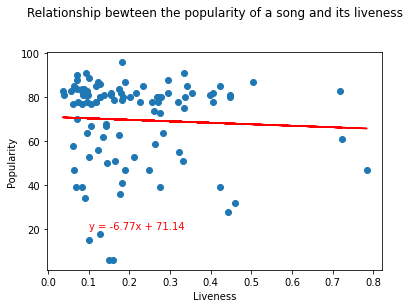

The r squared value is: 0.0025464748462913998

Pearson's correlation analysis: The correlation coefficient and the P-value are as follow: (-0.050462608397618555, 0.6162656565106043) 
This means there is a slight negative  correlation bewteen the variables and based on the P value we can not reject the null hypothesis. This means that there is no sufficient statistical evidence to show that there is a relationship bewteen the liveness of the song and its popularity.


In [32]:
#plot regression line for Liveness
x_axis = df['Liveness']
y_axis = df['Popularity']

(slope, intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y = '+ str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, color ='r')
plt.annotate(line_eq,(0.1, 20),color ='r')

#Create the lables
plt.title(f"Relationship bewteen the popularity of a song and its liveness\n\n")
plt.ylabel("Popularity")
plt.xlabel("Liveness")



#save image
plt.savefig("../Images/liv&popularity.png", facecolor = "w", bbox_inches= "tight" )

plt.show();


print(f'The r squared value is: {rvalue**2}\n')
print(f"Pearson's correlation analysis: The correlation coefficient and the P-value are as follow: {liv_pearson} ")
print("This means there is a slight negative  correlation bewteen the variables and based on the P value we can not reject the null hypothesis. This means that there is no sufficient statistical evidence to show that there is a relationship bewteen the liveness of the song and its popularity." )


#### Popularity & Loudness
Loudness referes to ... and its measurde by

Question: Is there a relationship bewteen the songs loudness level and its popularity?

Hypothesis: There is a relationship 
Null hypothesis: There is no relationship

Alpha value or significance level = 0.05


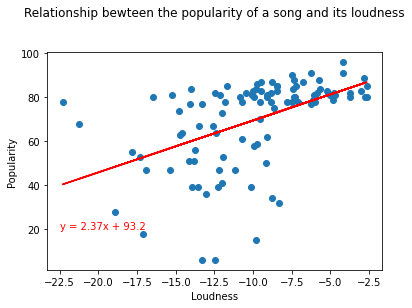

The r squared value is: 0.2458069399087262

Pearson's correlation analysis: The correlation coefficient and the P-value are as follow: (0.49578920914913654, 1.3513937979108743e-07) 
This means there is a moderate positive correlation bewteen the variables and based on the P value we can reject the null hypothesis. This means that there is  sufficient statistical evidence to show that there is a relationship bewteen the loudness of the song and its popularity.


In [33]:
#plot regression line for Loudness
x_axis = df['Loudness']
y_axis = df['Popularity']

(slope, intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y = '+ str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, color ='r')
plt.annotate(line_eq,(-22.50, 20),color ='r')

#Create the lables
plt.title(f"Relationship bewteen the popularity of a song and its loudness\n\n")
plt.ylabel("Popularity")
plt.xlabel("Loudness")


#save image
plt.savefig("../Images/lou&popularity.png", facecolor = "w", bbox_inches= "tight" )

plt.show();



print(f'The r squared value is: {rvalue**2}\n')
print(f"Pearson's correlation analysis: The correlation coefficient and the P-value are as follow: {lou_pearson} ")
print("This means there is a moderate positive correlation bewteen the variables and based on the P value we can reject the null hypothesis. This means that there is  sufficient statistical evidence to show that there is a relationship bewteen the loudness of the song and its popularity." )


#### Popularity & Speechiness
Speechiness referes to ... and its measurde by

Question: Is there a relationship bewteen the songs speechiness level and its popularity?

Hypothesis: There is a relationship 
Null hypothesis: There is no relationship

Alpha value or significance level = 0.05

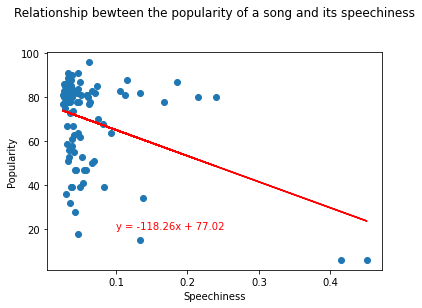

The r squared value is: 0.15189060730953236

Pearson's correlation analysis: The correlation coefficient and the P-value are as follow: (-0.38973145537604814, 5.613463522908384e-05) 
This means there is a moderate negative correlation bewteen the variables and based on the P value we can reject the null hypothesis. This means that there is sufficient statistical evidence to show that there is a relationship bewteen the speechiness of the song and its popularity.


In [34]:
#plot regression line for Speechiness
x_axis = df['Speechiness']
y_axis = df['Popularity']

(slope, intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y = '+ str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, color ='r')
plt.annotate(line_eq,(0.1, 20),color ='r')

#Create the lables
plt.title(f"Relationship bewteen the popularity of a song and its speechiness\n\n")
plt.ylabel("Popularity")
plt.xlabel("Speechiness")



#save image
plt.savefig("../Images/spe&popularity.png", facecolor = "w", bbox_inches= "tight" )
plt.show();



print(f'The r squared value is: {rvalue**2}\n')
print(f"Pearson's correlation analysis: The correlation coefficient and the P-value are as follow: {spe_pearson} ")
print("This means there is a moderate negative correlation bewteen the variables and based on the P value we can reject the null hypothesis. This means that there is sufficient statistical evidence to show that there is a relationship bewteen the speechiness of the song and its popularity." )


#### Popularity & Tempo
Tempo referes to ... and its measurde by

Question: Is there a relationship bewteen the songs tempo level and its popularity?

Hypothesis: There is a relationship 
Null hypothesis: There is no relationship

Alpha value or significance level = 0.05

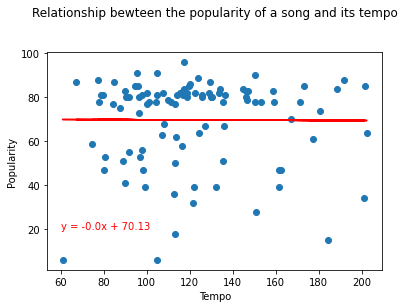

The r squared value is: 2.6906667019305908e-05

Pearson's correlation analysis: The correlation coefficient and the P-value are as follow: (-0.005187163677705345, 0.9589415979198488) 
This means there is no correlation bewteen the variables and based on the P value we can not reject the null hypothesis. This means that there is no sufficient statistical evidence to show that there is a relationship bewteen the tempo of the song and its popularity.


In [35]:
#plot regression line for Tempo
x_axis = df['Tempo']
y_axis = df['Popularity']

(slope, intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y = '+ str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, color ='r')
plt.annotate(line_eq,(60, 20),color ='r')

#Create the lables
plt.title(f"Relationship bewteen the popularity of a song and its tempo\n\n")
plt.ylabel("Popularity")
plt.xlabel("Tempo")



#save image
plt.savefig("../Images/tem&popularity.png", facecolor = "w", bbox_inches= "tight" )

plt.show();


print(f'The r squared value is: {rvalue**2}\n')
print(f"Pearson's correlation analysis: The correlation coefficient and the P-value are as follow: {tem_pearson} ")
print("This means there is no correlation bewteen the variables and based on the P value we can not reject the null hypothesis. This means that there is no sufficient statistical evidence to show that there is a relationship bewteen the tempo of the song and its popularity." )


#### Popularity & Valence
Valence referes to ... and its measurde by

Question: Is there a relationship bewteen the songs valence level and its popularity?

Hypothesis: There is a relationship 
Null hypothesis: There is no relationship

Alpha value or significance level = 0.05

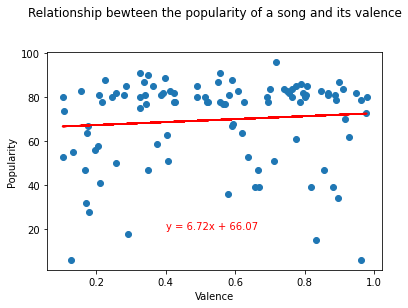

The r squared value is: 0.007759572781128184

Pearson's correlation analysis: The correlation coefficient and the P-value are as follow: (0.08808843727259663, 0.3810501562990273) 
This means there is a no correlation bewteen the variables and based on the P value we can reject the null hypothesis. This means that there is no sufficient statistical evidence to show that there is a relationship bewteen the valence of the song and its popularity.


In [36]:
#plot regression line for Valence
x_axis = df['Valence']
y_axis = df['Popularity']

(slope, intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y = '+ str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, color ='r')
plt.annotate(line_eq,(0.4, 20),color ='r')

#Create the lables
plt.title(f"Relationship bewteen the popularity of a song and its valence\n\n")
plt.ylabel("Popularity")
plt.xlabel("Valence")


#save image
plt.savefig("../Images/val&popularity.png", facecolor = "w", bbox_inches= "tight" )

#show figure
plt.show();


print(f'The r squared value is: {rvalue**2}\n')
print(f"Pearson's correlation analysis: The correlation coefficient and the P-value are as follow: {val_pearson} ")
print("This means there is a no correlation bewteen the variables and based on the P value we can reject the null hypothesis. This means that there is no sufficient statistical evidence to show that there is a relationship bewteen the valence of the song and its popularity." )
